In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import SpectralSynthesis as SS
import cmocean

In [2]:
H = np.array([1.0,0.5,0.0])
sigma = np.array([0.5,1.5,3.0])

In [3]:
N = 128
Seed = 120
E = 2

In [10]:
X=[]
for h in H:
    for sigm in sigma:
        seed=200
        X.append(SS.fBm(N=N,E=E,H=h,exp=True,sigma=sigm,seed=seed, centred = False, roll=(60,50)))

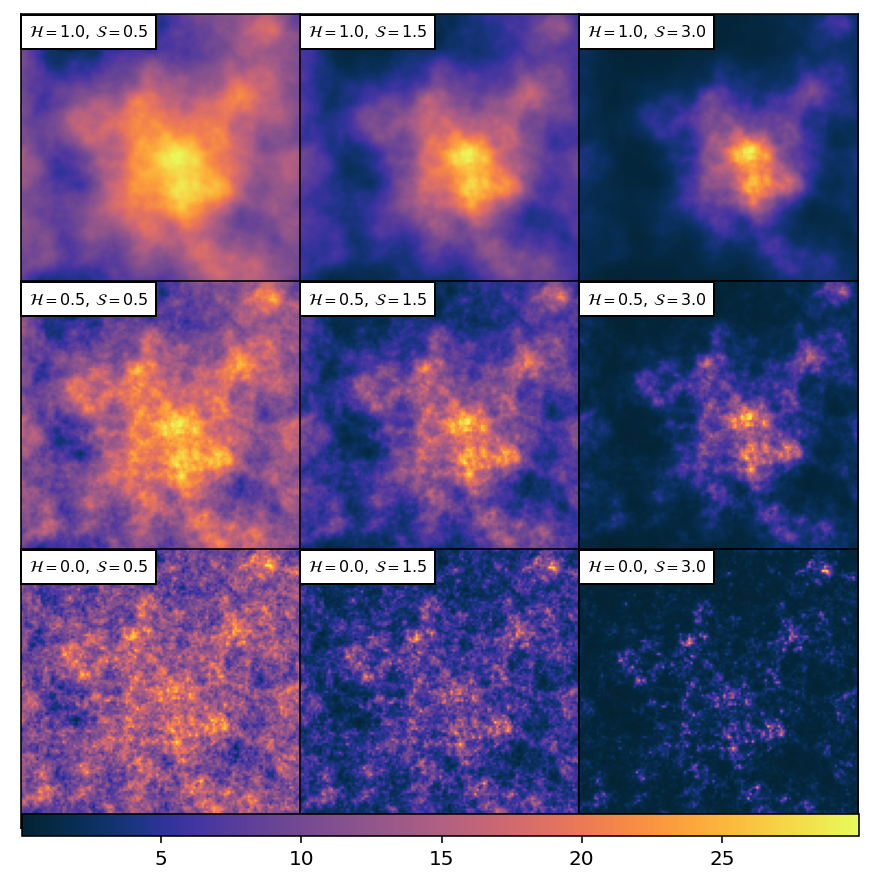

In [11]:
fig = plt.figure(figsize=(1080/144, 1080/144), dpi=144)
ax = [fig.add_subplot(3,3,i+1) for i in range(9)]

for i in range(9):
    a=ax[i]
    a.set_xticks([])
    a.set_yticks([])
    a.set_aspect('equal')
    img = a.imshow(X[i]**(1/3),cmap=cmocean.cm.thermal)#,norm=LogNorm())#, vmin=0.5,vmax=np.median(np.asarray(X).flatten())*10)
    if i == 0 or i == 1 or i ==2:
        a.text(2.85,10,r'$\cal H = $'+str(H[0])+', '+r'$\cal S = $'+str(sigma[i]),bbox = dict(facecolor='white'), fontsize = 8)
    if i == 3 or i == 4 or i == 5:
        a.text(2.85,10,r'$\cal H = $'+str(H[1])+', '+r'$\cal S = $'+str(sigma[i-3]),bbox = dict(facecolor='white'), fontsize = 8)
    if i == 6 or i == 7 or i == 8:
        a.text(2.85,10,r'$\cal H = $'+str(H[2])+', '+r'$\cal S = $'+str(sigma[i-6]),bbox = dict(facecolor='white'), fontsize = 8)

cbaxes = fig.add_axes([0.1252, 0.111, 0.775, 0.02]) 
cb = plt.colorbar(img,orientation="horizontal", cax = cbaxes)
fig.subplots_adjust(wspace=0, hspace=-0.1)
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/xfbmfields.png',bbox_inches="tight")
plt.show()

In [ ]:
import FractalVariates as FV

In [ ]:
V = []
for i in range(0,9):
    V.append(FV.variates(X[i,:,:],300))

V = np.asarray(V)
print(V.shape)
print(np.max(V))

In [ ]:
fig = plt.figure(figsize=(1080/144, 1080/144), dpi=144)
ax = [fig.add_subplot(3,3,i+1) for i in range(9)]

for i in range(9):
    a=ax[i]
    a.set_xticks([])
    a.set_yticks([])
    a.set_aspect('equal')
    a.scatter(V[i,:,0],V[i,:,1],c='k', s=0.5)
    a.set_xlim(0,1000)
    a.set_ylim(0,1000)
    if i == 0 or i == 1 or i ==2:
        a.text(50,900,r'$H = $'+str(H[0])+', '+r'$\sigma = $'+str(sigma[i]),bbox = dict(facecolor='white'), fontsize = 8)
    if i == 3 or i == 4 or i == 5:
        a.text(50,900,r'$H = $'+str(H[1])+', '+r'$\sigma = $'+str(sigma[i-3]),bbox = dict(facecolor='white'), fontsize = 8)
    if i == 6 or i == 7 or i == 8:
        a.text(50,900,r'$H = $'+str(H[2])+', '+r'$\sigma = $'+str(sigma[i-6]),bbox = dict(facecolor='white'), fontsize = 8)
    
fig.subplots_adjust(wspace=0, hspace=-0.1)
#plt.savefig('../SpectralSynthesis/MiscImages/2DVariates.png',bbox_inches="tight")
plt.show()

In [ ]:
import DeltaVar as DV

In [ ]:
L = np.linspace(0.005,1, 100)
v = 1.5

In [ ]:
sigma_d = []
H_params = []
A_params = []
B_params = []
for i in range(0,9):
    sigma_d_i = []
    for j in range(0,len(L)):
        sigma_d_i.append(DV.DeltaVar(X[i,:,:],L[j],v, method = 'fourier'))
        print(str(i)+':'+str(j))
    sigma_d.append(sigma_d_i)
    params = DV.HurstEstimator(sigma_d_i,L,shift=0.5)
    H_params.append(params[0])
    A_params.append(params[1])
    B_params.append(params[2])
    
sigma_d = np.asarray(sigma_d)
H_params = np.asarray(H_params)
A_params = np.asarray(A_params)
B_params = np.asarray(B_params)
print(sigma_d)

In [ ]:
print(H_params)
print(A_params)
print(B_params)

In [ ]:
log_L =np.log10(L)
log_sigma_d = np.log10(sigma_d)

In [ ]:
A = A_params[:,0]
B = B_params[:,0]

print(A)
print(B)

In [ ]:
H_est = H_params[:,0]
H_std = H_params[:,1]
print(H_est)
print(H_std)

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(1080/144, 1080/144), dpi=144)
ax = fig.add_subplot(111,zorder=1)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

for a, i in zip(axes.flat[0:], range(0,9)):
    a.set_zorder(2)
    if i == 0 or i == 1 or i ==2:
        a.text(0.05,0.9,r'$H = $'+str(H[0])+', '+r'$\sigma = $'+str(sigma[i]),bbox = dict(facecolor='white'), fontsize = 6, transform = a.transAxes)
    if i == 3 or i == 4 or i == 5:
        a.text(0.05,0.9,r'$H = $'+str(H[1])+', '+r'$\sigma = $'+str(sigma[i-3]),bbox = dict(facecolor='white'), fontsize = 6, transform = a.transAxes)
    if i == 6 or i == 7 or i == 8:
        a.text(0.05,0.9,r'$H = $'+str(H[2])+', '+r'$\sigma = $'+str(sigma[i-6]),bbox = dict(facecolor='white'), fontsize = 6, transform = a.transAxes)
    a.text(0.05,0.75,r'$H_{est}= $'+'%.2f'%H_est[i]+r'$\pm %.2f$'%H_std[i],bbox = dict(facecolor='white'), fontsize = 6, transform = a.transAxes)
    a.plot(log_L,log_sigma_d[i,:], 'r')
    a.plot(log_L,log_sigma_d[i,:], 'r+')
    y=DV.f(log_L,A[i],B[i])
    a.plot(log_L,y,'k')
    a.set_ylim(np.min(log_sigma_d[i,:]),np.max(log_sigma_d[i,:]))
    
fig.suptitle('Fourier Space Delta Variance')
ax.set_ylabel(r'$\log(\sigma^2_\Delta(L))$')
ax.set_xlabel(r'$\log(L[pixels])$')
plt.savefig('../SpectralSynthesis/MiscImages/ConvolveDeltaVar',bbox_inches="tight")
plt.show()